In [2]:


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [5]:
import os
data_path = "data"

print("📂 Current working directory:", os.getcwd())
print("📂 Files inside 'data' folder:\n", os.listdir(data_path))


📂 Current working directory: c:\Users\LavanyaS\Desktop\ETRM-data-analysis
📂 Files inside 'data' folder:
 ['etrm_trades.csv', 'etrm_trades.html', 'etrm_trades.json', 'etrm_trades.txt', 'etrm_trades.xlsx', 'etrm_trades.xml']


In [8]:
# Define file paths
csv_file = os.path.join(data_path, "etrm_trades.csv")
json_file = os.path.join(data_path, "etrm_trades.json")
excel_file = os.path.join(data_path, "etrm_trades.xlsx")
txt_file = os.path.join(data_path, "etrm_trades.txt")
html_file = os.path.join(data_path, "etrm_trades.html")
xml_file = os.path.join(data_path, "etrm_trades.xml")

# Load datasets
df_csv = pd.read_csv(csv_file)
df_json = pd.read_json(json_file)
df_excel = pd.read_excel(excel_file)
df_txt = pd.read_csv(txt_file, delimiter="|")
df_html = pd.read_html(html_file)[0]
df_xml = pd.read_xml(xml_file)

print("✅ All files loaded successfully")
print("\nCSV sample:\n", df_csv.head())


✅ All files loaded successfully

CSV sample:
    TradeID Commodity TradeType  Volume   Price Currency DeliveryStart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  DeliveryEnd Periodicity  
0  2025-01-16     Monthly  
1  2025-02-16   Quarterly  
2  2025-01-10       Daily  
3  2025-02-13       Daily  
4  2025-02-04   Quarterly  


In [9]:
# Check columns
print("CSV:", df_csv.columns.tolist())
print("JSON:", df_json.columns.tolist())
print("Excel:", df_excel.columns.tolist())
print("TXT:", df_txt.columns.tolist())
print("HTML:", df_html.columns.tolist())
print("XML:", df_xml.columns.tolist())

# Clean column names
datasets = [df_csv, df_json, df_excel, df_txt, df_html, df_xml]
for i, df in enumerate(datasets):
    df.columns = [col.strip() for col in df.columns]
    print(f"✅ Cleaned column names for DataFrame {i+1}")

# Use CSV as master dataset
df = df_csv.copy()
print("\n📌 Master dataset created from CSV file")
print(df.head())


CSV: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
JSON: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
Excel: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
TXT: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
HTML: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
XML: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity']
✅ Cleaned column names for DataFrame 1
✅ Cleaned column names for DataFrame 2
✅ Cleaned column names for DataFrame 3
✅ Cleaned column names for DataFrame 4
✅ Cleaned column names for DataFrame 5
✅ Cleaned column names for DataFrame 6

📌 Master dataset created from CSV f

In [10]:
df["DeliveryStart"] = pd.to_datetime(df["DeliveryStart"])
df["DeliveryEnd"] = pd.to_datetime(df["DeliveryEnd"])
df["Notional"] = df["Volume"] * df["Price"]

print("✅ Converted DeliveryStart & DeliveryEnd to datetime")
print("✅ Added Notional column")
print("\nCleaned data sample:\n", df.head())


✅ Converted DeliveryStart & DeliveryEnd to datetime
✅ Added Notional column

Cleaned data sample:
    TradeID Commodity TradeType  Volume   Price Currency DeliveryStart  \
0        1     Power       BUY  193.52  191.13      GBP    2025-01-08   
1        2       Gas       BUY  368.68  127.76      GBP    2025-01-29   
2        3     Power      SELL   86.45   48.08      USD    2025-01-03   
3        4       Gas       BUY   38.46  175.91      GBP    2025-01-23   
4        5      Coal       BUY  304.55  147.45      EUR    2025-01-09   

  DeliveryEnd Periodicity    Notional  
0  2025-01-16     Monthly  36987.4776  
1  2025-02-16   Quarterly  47102.5568  
2  2025-01-10       Daily   4156.5160  
3  2025-02-13       Daily   6765.4986  
4  2025-02-04   Quarterly  44905.8975  


In [12]:
avg_price = df.groupby("Commodity")["Price"].mean()
print("Average Price per Commodity:\n", avg_price)


Average Price per Commodity:
 Commodity
Coal     104.642941
Gas      119.778437
Oil      101.757826
Power    100.469643
Name: Price, dtype: float64


In [13]:
currency_counts = df["Currency"].value_counts()
print("Trade Distribution by Currency:\n", currency_counts)


Trade Distribution by Currency:
 Currency
GBP    38
USD    34
EUR    28
Name: count, dtype: int64


In [14]:
periodicity_counts = df["Periodicity"].value_counts()
print("Trade Periodicity Breakdown:\n", periodicity_counts)


Trade Periodicity Breakdown:
 Periodicity
Daily        41
Quarterly    31
Monthly      28
Name: count, dtype: int64


In [15]:
import os

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

print(f"✅ Output folder ready at: {output_dir}")


✅ Output folder ready at: output


✅ Data loaded. Shape: (100, 10)
📌 Columns: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity', 'Notional']


C:\Users\LavanyaS\AppData\Local\Temp\ipykernel_28500\1758927477.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


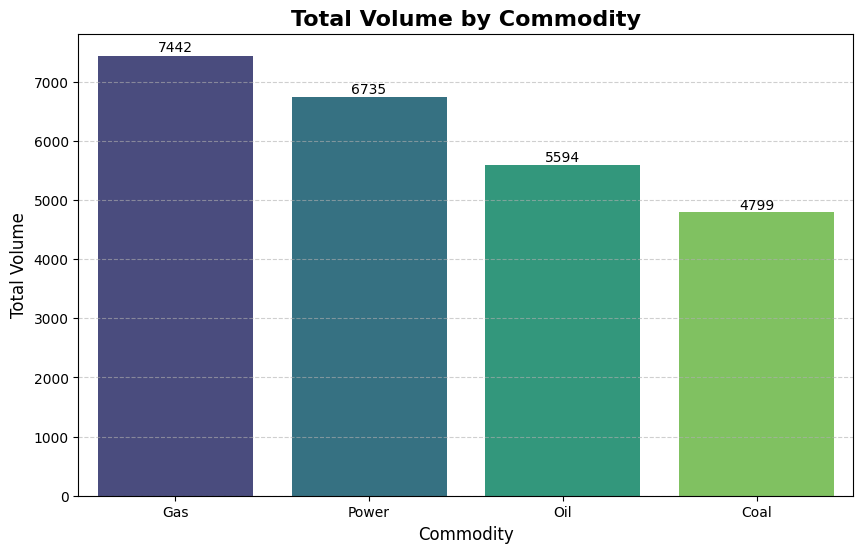

vertical bar chart created and saved at output\volume_by_commodity.png


In [8]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Define paths
data_path = "data"
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# 3. Load dataset (from CSV)
csv_file = os.path.join(data_path, "etrm_trades.csv")
df = pd.read_csv(csv_file)

# 4. Create Notional column if not already there
if "Notional" not in df.columns:
    df["Notional"] = df["Volume"] * df["Price"]

print("✅ Data loaded. Shape:", df.shape)
print("📌 Columns:", df.columns.tolist())

# 5. Compute total volume per commodity and sort
commodity_volume = (
    df.groupby("Commodity")["Volume"]
    .sum()
    .reset_index()
    .sort_values(by="Volume", ascending=False)
)

# 6. Plot vertical bar chart
plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x="Commodity", 
    y="Volume", 
    data=commodity_volume, 
    palette="viridis"
)

# Add value labels above bars
for i, v in enumerate(commodity_volume["Volume"]):
    plt.text(i, v + (0.01 * v), str(int(v)), ha="center", fontsize=10, color="black")

# Styling
plt.title("Total Volume by Commodity", fontsize=16, weight="bold")
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 7. Save chart
bar_path = os.path.join(output_dir, "volume_by_commodity.png")
plt.savefig(bar_path, bbox_inches="tight")
plt.show()

print(f"vertical bar chart created and saved at {bar_path}")


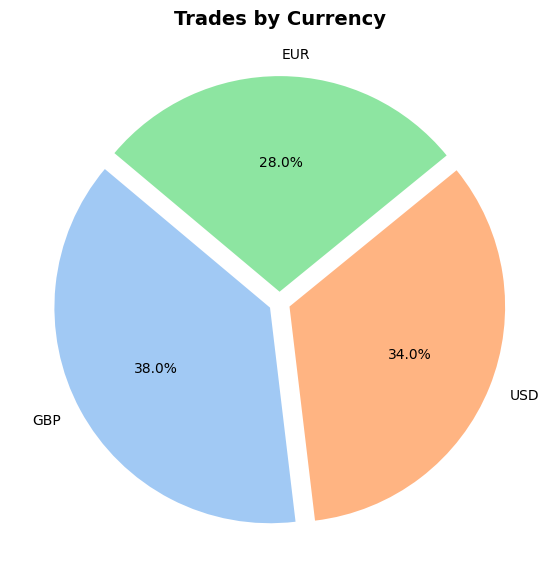

✅ Pie chart created and saved at output\trades_by_currency.png


In [21]:
plt.figure(figsize=(7,7))
colors = sns.color_palette("pastel")

df["Currency"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=[0.05]*df["Currency"].nunique()
)

plt.title("Trades by Currency", fontsize=14, weight="bold")
plt.ylabel("")

# Save to file
pie_path = os.path.join(output_dir, "trades_by_currency.png")
plt.savefig(pie_path, bbox_inches="tight")
plt.show()

print(f"✅ Pie chart created and saved at {pie_path}")


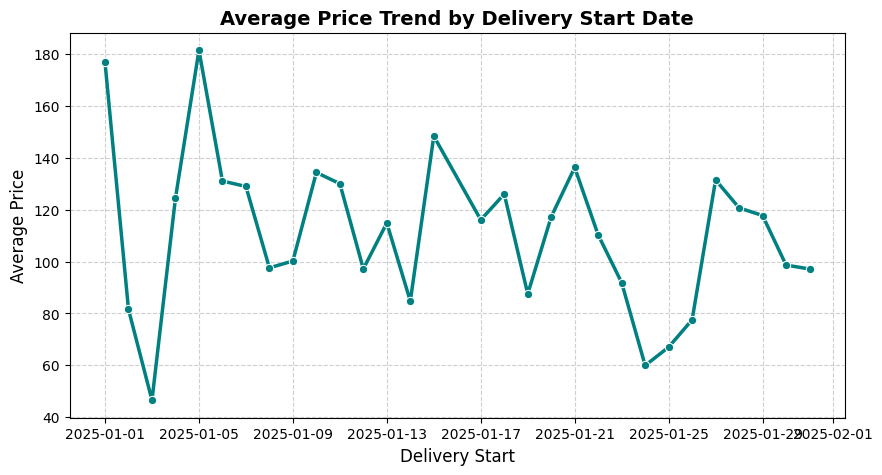

✅ Line chart created and saved at output\price_trend.png


In [20]:
price_trend = df.groupby("DeliveryStart")["Price"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=price_trend.index, y=price_trend.values, marker="o", linewidth=2.5, color="teal")

plt.title("Average Price Trend by Delivery Start Date", fontsize=14, weight="bold")
plt.xlabel("Delivery Start", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Save to file
line_path = os.path.join(output_dir, "price_trend.png")
plt.savefig(line_path, bbox_inches="tight")
plt.show()

print(f"✅ Line chart created and saved at {line_path}")


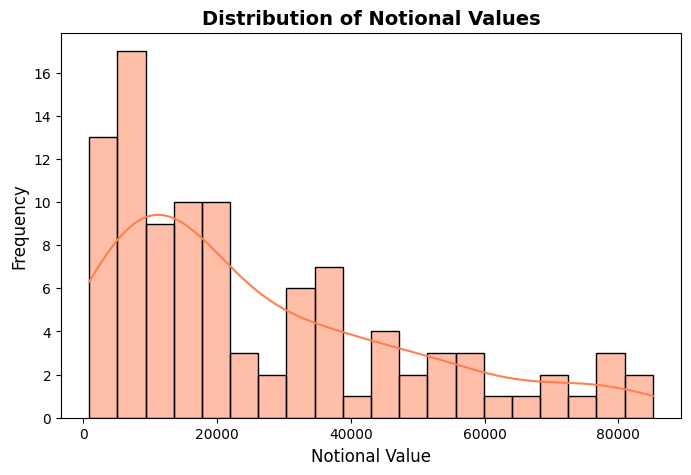

✅ Histogram created and saved at output\notional_distribution.png


In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["Notional"], bins=20, kde=True, color="coral")

plt.title("Distribution of Notional Values", fontsize=14, weight="bold")
plt.xlabel("Notional Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Save to file
hist_path = os.path.join(output_dir, "notional_distribution.png")
plt.savefig(hist_path, bbox_inches="tight")
plt.show()

print(f"✅ Histogram created and saved at {hist_path}")


In [24]:
print("📋 Columns in df:", df.columns.tolist())


📋 Columns in df: ['TradeID', 'Commodity', 'TradeType', 'Volume', 'Price', 'Currency', 'DeliveryStart', 'DeliveryEnd', 'Periodicity', 'Notional']


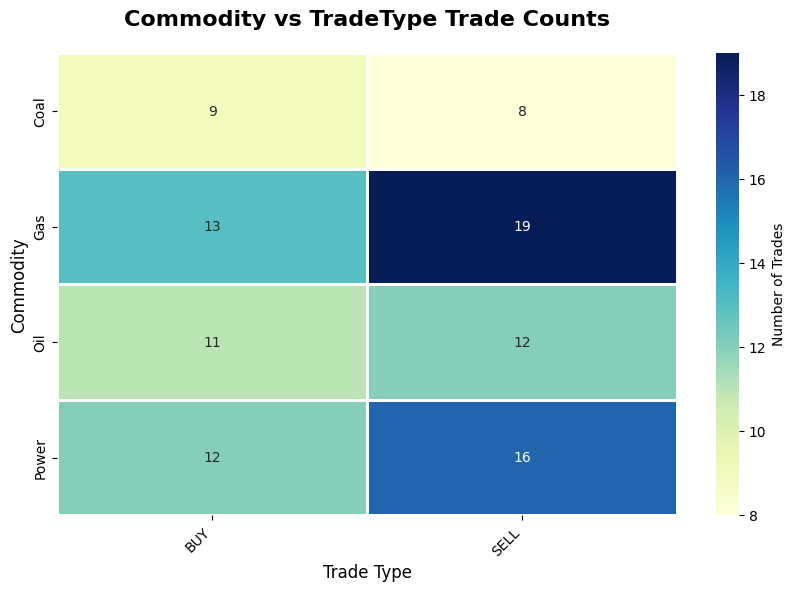

heatmap created and saved at output\commodity_vs_tradetype.png


In [10]:
# Pivot table: Commodity vs TradeType
pivot = df.pivot_table(
    index="Commodity", 
    columns="TradeType", 
    values="TradeID", 
    aggfunc="count", 
    fill_value=0
)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot, 
    annot=True, fmt="d", 
    cmap="YlGnBu",       # professional colormap
    linewidths=1,        # thicker gridlines
    linecolor="white",   # white borders for clarity
    cbar_kws={'label': 'Number of Trades'}  # color bar label
)

# Styling
plt.title("Commodity vs TradeType Trade Counts", fontsize=16, weight="bold", pad=20)
plt.xlabel("Trade Type", fontsize=12)
plt.ylabel("Commodity", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha="right")

# Save to output folder
heatmap_path = os.path.join(output_dir, "commodity_vs_tradetype.png")
plt.savefig(heatmap_path, bbox_inches="tight")
plt.show()

print(f"heatmap created and saved at {heatmap_path}")


In [27]:
# Path for Excel output
excel_output = os.path.join(output_dir, "etrm_analysis_summary.xlsx")

# Prepare summary DataFrames
avg_price = df.groupby("Commodity")["Price"].mean().reset_index()
currency_counts = df["Currency"].value_counts().reset_index()
currency_counts.columns = ["Currency", "Trade_Count"]
periodicity_counts = df["Periodicity"].value_counts().reset_index()
periodicity_counts.columns = ["Periodicity", "Trade_Count"]

# Write to Excel with multiple sheets
with pd.ExcelWriter(excel_output, engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Cleaned_Data", index=False)
    avg_price.to_excel(writer, sheet_name="Avg_Price_Per_Commodity", index=False)
    currency_counts.to_excel(writer, sheet_name="Trades_By_Currency", index=False)
    periodicity_counts.to_excel(writer, sheet_name="Periodicity_Breakdown", index=False)

print(f"✅ Excel summary report generated at: {excel_output}")


✅ Excel summary report generated at: output\etrm_analysis_summary.xlsx


In [28]:
# Path for summary report
summary_path = os.path.join(output_dir, "etrm_analysis_summary.md")

# Build summary text
summary_text = f"""
# 📊 ETRM Data Analysis Summary

## ✅ Key Insights
1. **Average Price per Commodity**  
   - Shows how pricing differs across commodities.  
   - Example (first 5):  
   {df.groupby("Commodity")["Price"].mean().head().to_string()}

2. **Trades by Currency**  
   - Highlights which currencies dominate trading.  
   - {df['Currency'].value_counts().to_dict()}

3. **Periodicity Breakdown**  
   - Reveals trade frequency patterns (Daily, Weekly, Monthly).  
   - {df['Periodicity'].value_counts().to_dict()}

4. **Notional Value Distribution**  
   - Shows variation in trade sizes (Volume × Price).  

5. **Heatmap Insights**  
   - Highlights concentration of trades by Commodity vs TradeType / Currency.  

---

## 📂 Generated Outputs
- Charts saved in `output/` folder:  
  - `volume_by_commodity.png`  
  - `trades_by_currency.png`  
  - `price_trend.png`  
  - `notional_distribution.png`  
  - `commodity_vs_tradetype.png` / `commodity_vs_currency.png`  

- Excel report:  
  - `etrm_analysis_summary.xlsx`  

This analysis provides both **data insights** and **visualizations** to understand trade patterns clearly.
"""

# Save summary file
with open(summary_path, "w", encoding="utf-8") as f:
    f.write(summary_text)

print(f"✅ Summary report generated at: {summary_path}")


✅ Summary report generated at: output\etrm_analysis_summary.md
